In [2]:
# --- Setup and Data Loading ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set_style("whitegrid")

# Load the dataset (Assuming the file "Netflix Dataset.csv" is uploaded to the Colab environment)
try:
    df = pd.read_csv("Netflix Dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Netflix Dataset.csv not found. Please upload the file to your Colab session.")
    exit() # Exit if the file is not found

# Initial Data Cleaning and Preparation
# 1. Convert 'Release_Date' to datetime and extract the year
df_cleaned = df.dropna(subset=['Release_Date']).copy()
df_cleaned['Release_Year'] = pd.to_datetime(df_cleaned['Release_Date'], errors='coerce').dt.year
print("\nData cleaned and 'Release_Year' extracted.")
print(f"Analysis scope: {len(df_cleaned)} titles.")

# --- Helper Function for Visualization ---
def save_and_show_plot(filename, title):
    """Saves the plot and prints a confirmation."""
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    print(f"Generated plot: {title} saved as {filename}")

# --- Set a color palette for consistency ---
palette = sns.color_palette("viridis", 10)

Dataset loaded successfully.

Data cleaned and 'Release_Year' extracted.
Analysis scope: 7779 titles.



--- 1. Content Growth Analysis ---


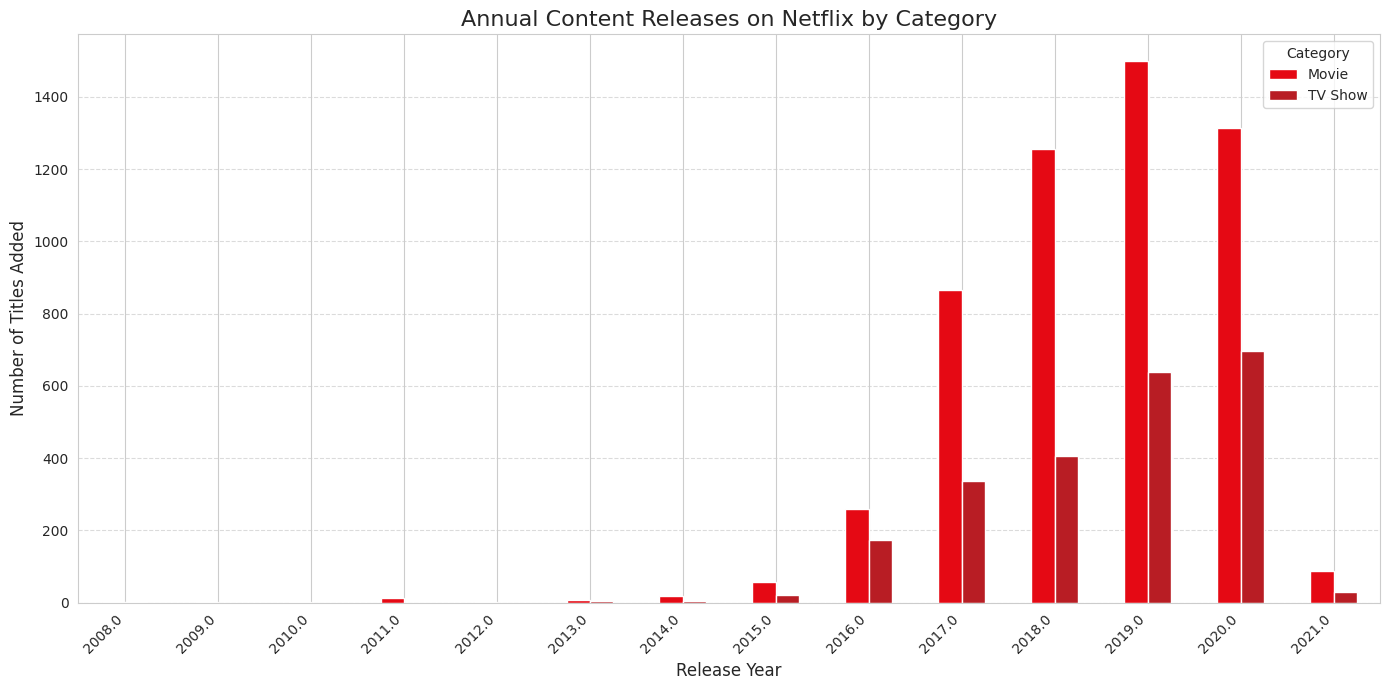

Generated plot: Annual Content Releases saved as annual_content_releases.png


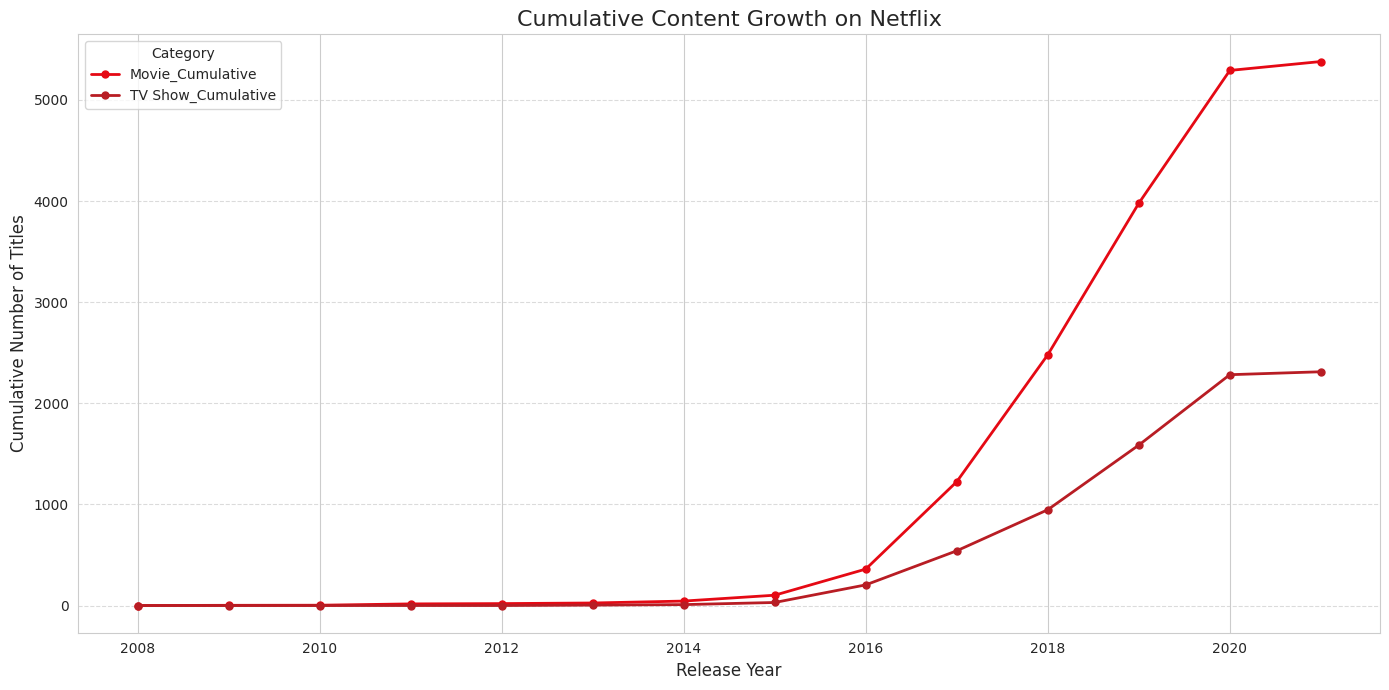

Generated plot: Cumulative Content Growth saved as cumulative_content_growth.png


In [3]:
# --- 1. Analyze Content Distribution and Growth (Movies vs. TV Shows) ---
print("\n--- 1. Content Growth Analysis ---")

content_growth = df_cleaned.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')
content_growth_pivot = content_growth.pivot(index='Release_Year', columns='Category', values='Count').fillna(0)

# Calculate cumulative count
content_growth_pivot['Movie_Cumulative'] = content_growth_pivot['Movie'].cumsum()
content_growth_pivot['TV Show_Cumulative'] = content_growth_pivot['TV Show'].cumsum()

# Plot 1: Annual Content Added
plt.figure(figsize=(14, 7))
content_growth_pivot[['Movie', 'TV Show']].plot(kind='bar', stacked=False, figsize=(14, 7), color=['#E50914', '#B81D24'], ax=plt.gca())
plt.title('Annual Content Releases on Netflix by Category', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_and_show_plot('annual_content_releases.png', 'Annual Content Releases')

# Plot 2: Cumulative Content Growth
plt.figure(figsize=(14, 7))
content_growth_pivot[['Movie_Cumulative', 'TV Show_Cumulative']].plot(
    kind='line', marker='o', figsize=(14, 7), color=['#E50914', '#B81D24'], linewidth=2, markersize=5, ax=plt.gca()
)
plt.title('Cumulative Content Growth on Netflix', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Cumulative Number of Titles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_and_show_plot('cumulative_content_growth.png', 'Cumulative Content Growth')


--- 2. Genre Popularity Analysis ---
Top 10 Most Frequent Genres:
 | Genre                    | count   |
|:-------------------------|:--------|
| International Movies     | 2437    |
| Dramas                   | 2108    |
| Comedies                 | 1472    |
| International TV Shows   | 1198    |
| Documentaries            | 786     |
| Action & Adventure       | 721     |
| TV Dramas                | 703     |
| Independent Movies       | 675     |
| Children & Family Movies | 532     |
| Romantic Movies          | 531     |


/tmp/ipython-input-4224557240.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette=palette)


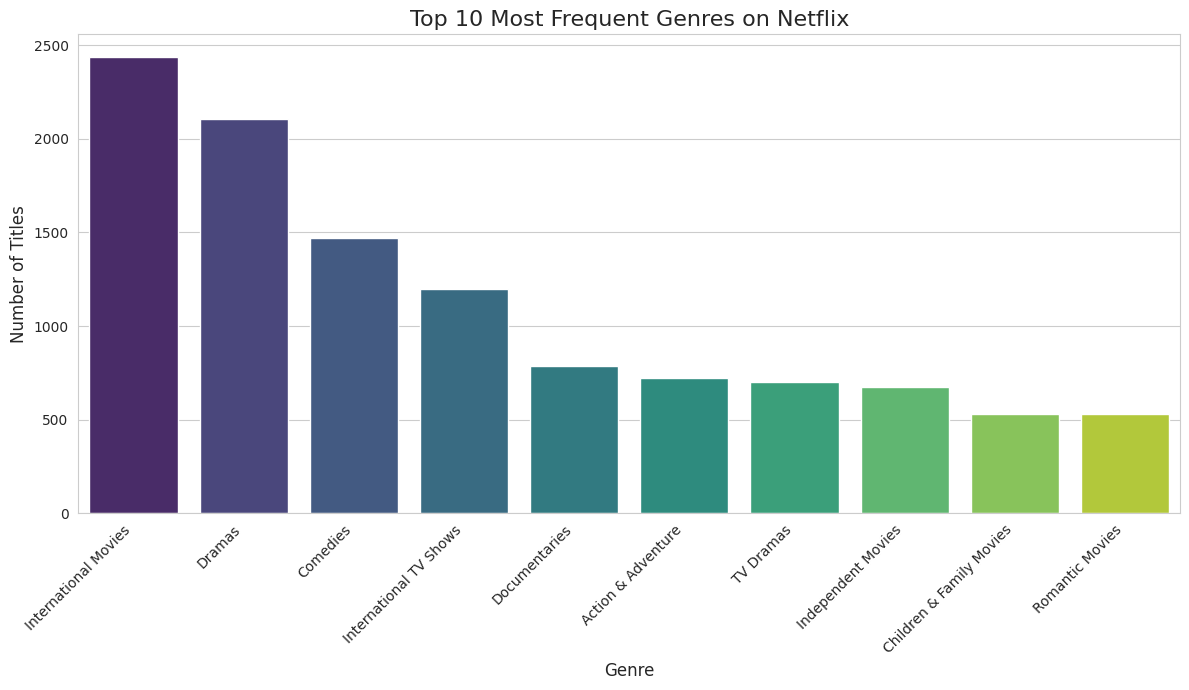

Generated plot: Top 10 Most Frequent Genres saved as top_10_genres.png


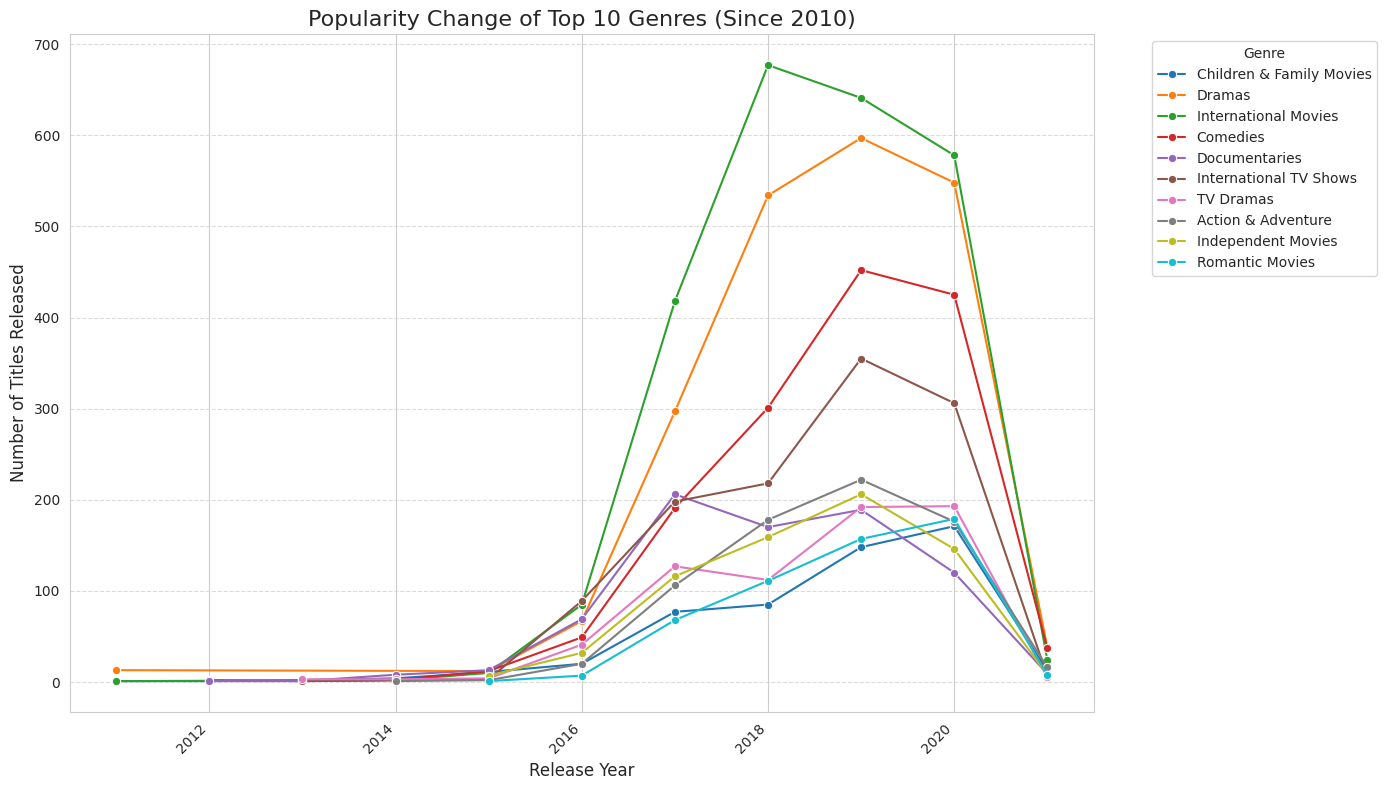

Generated plot: Genre Popularity Over Time saved as genre_popularity_over_time.png


In [4]:
# --- 2. Analyze Genre Popularity ---
print("\n--- 2. Genre Popularity Analysis ---")

# Split the 'Type' column and explode the genres
df_genres = df_cleaned.copy()
df_genres['Genre'] = df_genres['Type'].str.split(', ')
df_genres_exploded = df_genres.explode('Genre')

# Identify Top 10 Genres
top_10_genres = df_genres_exploded['Genre'].value_counts().head(10)
print("Top 10 Most Frequent Genres:\n", top_10_genres.to_markdown(numalign="left", stralign="left"))

# Plot 3: Top 10 Most Frequent Genres (Overall)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette=palette)
plt.title('Top 10 Most Frequent Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
save_and_show_plot('top_10_genres.png', 'Top 10 Most Frequent Genres')

# Plot 4: Popularity Change of Top 10 Genres Over Time
genre_popularity_over_time = df_genres_exploded[df_genres_exploded['Genre'].isin(top_10_genres.index)]
genre_growth = genre_popularity_over_time.groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
# Filter to recent years to see modern trends clearly
recent_years = genre_growth[genre_growth['Release_Year'] >= 2010]
sns.lineplot(data=recent_years, x='Release_Year', y='Count', hue='Genre', marker='o', palette='tab10')
plt.title('Popularity Change of Top 10 Genres (Since 2010)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
save_and_show_plot('genre_popularity_over_time.png', 'Genre Popularity Over Time')


--- 3. Country Contribution Analysis ---
Top 10 Contributing Countries:
 | Country_Single   | count   |
|:-----------------|:--------|
| United States    | 3297    |
| India            | 990     |
| United Kingdom   | 722     |
| Canada           | 412     |
| France           | 349     |
| Japan            | 287     |
| Spain            | 215     |
| South Korea      | 212     |
| Germany          | 199     |
| Mexico           | 154     |


/tmp/ipython-input-2721801979.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=palette)


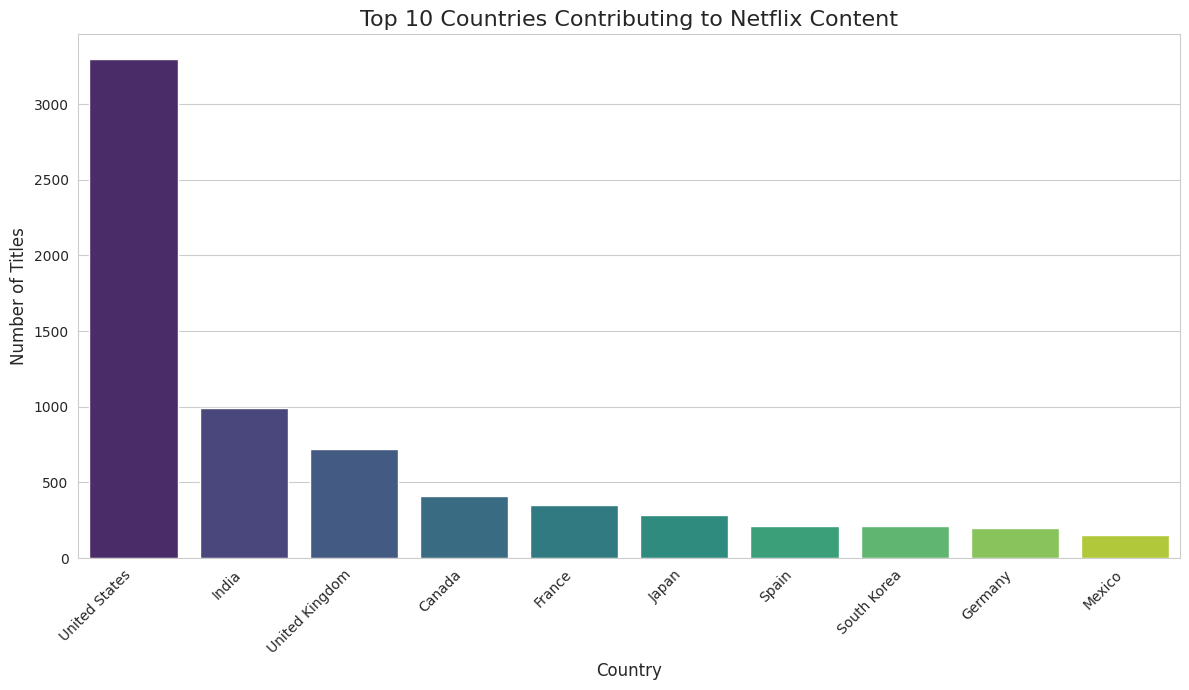

Generated plot: Top 10 Contributing Countries saved as top_10_countries.png


In [5]:
# --- 3. Analyze Country-Wise Contributions ---
print("\n--- 3. Country Contribution Analysis ---")

# Drop rows with missing 'Country' values
df_countries = df.dropna(subset=['Country']).copy()

# Split the 'Country' column and explode the countries
df_countries['Country_Single'] = df_countries['Country'].str.split(', ')
df_countries_exploded = df_countries.explode('Country_Single')

# Compare country-wise contributions
country_counts = df_countries_exploded['Country_Single'].value_counts()
top_10_countries = country_counts.head(10)
print("Top 10 Contributing Countries:\n", top_10_countries.to_markdown(numalign="left", stralign="left"))

# Plot 5: Top 10 Contributing Countries
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=palette)
plt.title('Top 10 Countries Contributing to Netflix Content', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
save_and_show_plot('top_10_countries.png', 'Top 10 Contributing Countries')